In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7366 - accuracy: 0.7552 - val_loss: 0.5284 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4935 - accuracy: 0.8292 - val_loss: 0.4458 - val_accuracy: 0.8494
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4457 - accuracy: 0.8453 - val_loss: 0.4122 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4167 - accuracy: 0.8535 - val_loss: 0.3997 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3971 - accuracy: 0.8599 - val_loss: 0.3974 - val_accuracy: 0.8636
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3799 - accuracy: 0.8652 - val_loss: 0.3667 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3651 - accuracy: 0.8708 - val_loss: 0.3632 - val_accuracy:

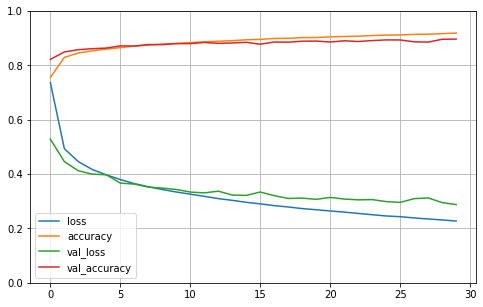

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [18]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.9873 - accuracy: 0.1000


[2.9873225688934326, 0.10000000149011612]